# Exercício de Construção de Árvore de Decisão


O objetivo é construir a árvore com base apenas no conjunto de **treinamento** e depois prever os exemplos de **teste**.


In [7]:
import pandas as pd
from collections import Counter
from graphviz import Digraph
from IPython.display import Image, display

In [8]:
df = pd.DataFrame({
    'tempo':       [0, 0, 1, 1, 0, 1, 1, 0],
    'umido':       [1, 0, 1, 1, 0, 0, 1, 0],
    'vento':       [0, 1, 0, 1, 0, 1, 0, 1],
    'jogar':       ['nao', 'nao', 'sim', 'nao', 'nao', 'sim', 'sim', 'nao']
})

df.head()

,tempo,umido,vento,jogar
0,0,1,0,nao
1,0,0,1,nao
2,1,1,0,sim
3,1,1,1,nao
4,0,0,0,nao


In [5]:
# Função para calcular o índice de Gini de um grupo
def gini(grupo):
    contagem = Counter(grupo)  # Conta quantas vezes cada classe aparece
    total = len(grupo)          # Número total de exemplos no grupo
    # Fórmula do Gini: 1 - soma das proporções ao quadrado
    return 1 - sum((n/total)**2 for n in contagem.values())

# Função para calcular o Gini ponderado de uma divisão
def gini_split(df, coluna, valor):
    # Divide o dataframe em dois grupos
    esq = df[df[coluna] == valor]['jogar']    # Grupo onde coluna == valor
    dir = df[df[coluna] != valor]['jogar']     # Grupo onde coluna != valor
    total = len(df)                            # Número total de exemplos
    # Gini ponderado: proporção do grupo * gini do grupo
    return (len(esq)/total)*gini(esq) + (len(dir)/total)*gini(dir)

# Função para encontrar a melhor divisão possível
def melhor_split(df):
    melhor_coluna = None
    melhor_valor = None
    melhor_gini = 1  # Começamos com Gini máximo (impureza máxima)
    
    # Para cada coluna (exceto a coluna alvo)
    for coluna in df.columns.drop('jogar'):
        for valor in df[coluna].unique():  # Para cada valor possível da coluna
            g = gini_split(df, coluna, valor)  # Calcula o gini da divisão
            if g < melhor_gini:  # Se melhorou o gini, atualiza o melhor split
                melhor_gini = g
                melhor_coluna = coluna
                melhor_valor = valor
    # Retorna a melhor coluna e valor para dividir
    return melhor_coluna, melhor_valor

# Função para construir a árvore como um dicionário
def construir_dict(df):
    # Caso base: todos exemplos têm a mesma classe → nó folha
    if len(df['jogar'].unique()) == 1:
        return {'label': f"Classe: {df['jogar'].iloc[0]}"}
    
    # Caso recursivo: encontrar o melhor split
    coluna, valor = melhor_split(df)
    label = f"{coluna} == {valor}?"  # Pergunta que será feita no nó
    
    # Divide o dataframe em dois grupos
    esq = df[df[coluna] == valor]
    dir = df[df[coluna] != valor]
    
    # Recursivamente constrói subárvores
    return {
        'label': label,
        'sim': construir_dict(esq),
        'nao': construir_dict(dir)
    }

# Função para adicionar nós no grafo do Graphviz
def adicionar_nos(g, nodo, nome='root'):
    g.node(nome, nodo['label'])  # Cria o nó com a label atual
    
    if 'sim' in nodo:
        g.edge(nome, nome + '_sim', label='Sim')  # Cria aresta "Sim"
        adicionar_nos(g, nodo['sim'], nome + '_sim')  # Continua no filho "Sim"
    
    if 'nao' in nodo:
        g.edge(nome, nome + '_nao', label='Não')  # Cria aresta "Não"
        adicionar_nos(g, nodo['nao'], nome + '_nao')  # Continua no filho "Não"

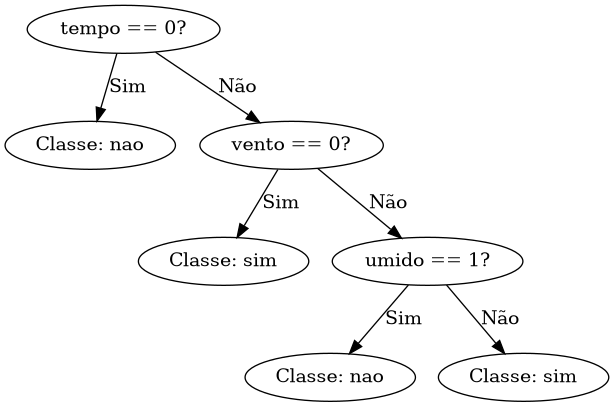

In [6]:
# Construir e exibir
arvore_dict = construir_dict(df)
g = Digraph(format='png')
adicionar_nos(g, arvore_dict)
display(Image(g.pipe(format='png')))